# Text Mining


In [7]:
import multiprocessing

import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # omw = open multilingual wordnet
stopword_list = set(stopwords.words('english'))
reg_tokenizer = nltk.RegexpTokenizer(r"\w+")  # tokenizes and removes punctuation at the same time
wordnet_lemmatizer = WordNetLemmatizer();

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\finnv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\finnv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\finnv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\finnv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Data Loading and Preprocessing

## (a)

,text,label
0,i would think that whomever would be lucky eno...,Love
1,i fear that they won t ever feel that deliciou...,Joy
2,im forever taking some time out to have a lie ...,Surprise
3,i try to be nice though so if you get a bitchy...,Joy
4,i have officially graduated im not feeling as ...,Joy


,text,label
count,247910,247910
unique,236060,4
top,i feel more adventurous willing to take risks,Joy
freq,16,141067


<Axes: xlabel='label', ylabel='count'>

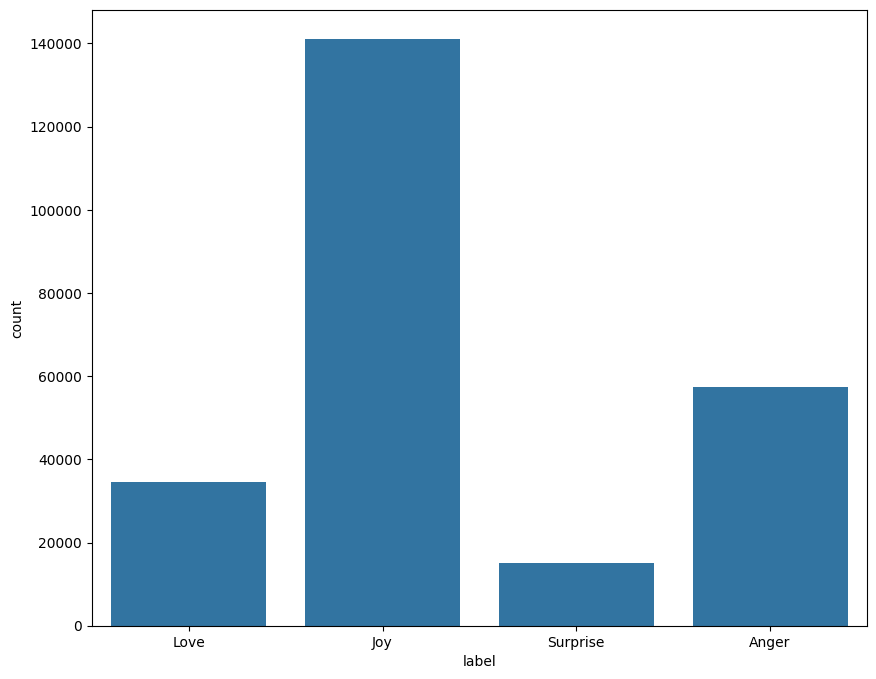

In [8]:
df = pd.read_csv("text_mining/emotions.csv")

display(df.head())
display(df.describe())
plt.figure(figsize=(10,8))
sns.countplot(x="label", data=df)

## (b)

(59888, 2)


,text,label
0,i feel like a jerk because the library student...,Anger
1,i miss all the others as well that feel that i...,Anger
2,i saunter through the airport terminals feelin...,Anger
3,i need to feel dangerous and pretty so here a ...,Anger
4,when,Anger


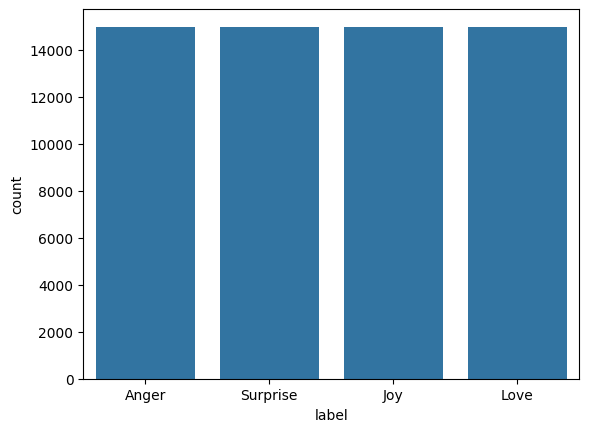

In [34]:
# under sampling by taking the k first entrys from each 

labels = df["label"].unique()
min_label = min([len(df[df["label"]==label]) for label in labels])
#instantiate df for concat
df_balanced = pd.DataFrame([],columns=["text","label"])

for label in labels:
    df_balanced = pd.concat([df[df["label"] == label][:min_label],df_balanced],ignore_index=True)


print(np.shape(df_balanced))
display(df_balanced.head())
# verification
sns.countplot(x="label", data=df_balanced)
df = df_balanced


In [56]:
def preprocessing(df: pd.DataFrame)-> list:
    corpus = df["text"]
    doc_list =[]
    for i in range(len(corpus)):
        text = corpus[i]
        tokenized = reg_tokenizer.tokenize(text)
        filtered = [word.lower() for word in tokenized if word.lower() not in stopword_list]
        # print(len(text)-len(filtered))
        lemmatized  = [wordnet_lemmatizer.lemmatize(word) for word in filtered]
        doc = " ".join(lemmatized)
        doc_list.append(doc)
    df_out = pd.DataFrame({"document":doc_list,"label": list(df["label"])})
    return df_out
# calc the difference in length for between un-/preprocessed
...


,document,label
0,feel like jerk library student claim love scra...,Anger
1,miss others well feel wronged soon understand ...,Anger
2,saunter airport terminal feeling experience re...,Anger
3,need feel dangerous pretty striking dance pick...,Anger
4,,Anger
...,...,...
59883,felt numb quite although feel loving,Love
59884,didnt feel accepted shit happened longer coupl...,Love
59885,im feeling rather delicate morning back work w...,Love
59886,trying wean knee jerk good job reaction easy r...,Love


## Bag-of-Words

## N-Grams

## Word2Vec